In [1]:
%load_ext autoreload
%autoreload 2
# import pandas as pd
import scripts.config as cfg
from os.path import join
from analysis_settings import *
from plot_settings import *
import numpy as np
import matplotlib.pyplot as plt
from scripts.utils_plot import _add_band, _add_band_annotations
from scripts.utils_plot import _save_fig, plot_corrs, _axes2d
import matplotlib.ticker as mtick
import matplotlib.lines as mlines

In [2]:
sns.set_style('darkgrid')

In [3]:
ch_choice = 'ch_dist_sweet'
dataframes = get_dfs(ch_choice)
df = dataframes['df_per']

cond = 'on'
col = f"patient_symptom_dominant_side_BR_{cond}"

df = df[~df.project.isin(['all']) & df[col].isin(['mild side', 'severe side'])]
df = df[(df.dominant_side_consistent & df.cond.isin(['on'])) | (df.cond.isin(['off']))]
# remove subjects without fooof
df = df[df.fm_exponent > -1e9]

/Users/moritzgerster/Library/CloudStorage/Dropbox/Code/STN_broadband_power/notebooks/analysis_settings.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['sub_hemi_cond'] = df.sub_hemi + '_' + df.cond
/Users/moritzgerster/Library/CloudStorage/Dropbox/Code/STN_broadband_power/notebooks/analysis_settings.py:81: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pivot['UPDRS_exists'] = pivot.UPDRS_bradyrigid_contra.notna()
/Users/moritzgerster/Library/CloudStorage/Dropbox/Code/STN_broadband_power/notebooks/analysis_settings.py:82: 

# Plot fits low gamma

In [4]:
# # nice_subs = ['FloML007', 'FloML020', 'FloML023', 'HirML003', 'LitML009', 'NeuEL004', 'NeuEL006', 'NeuEL009', 'NeuEL010', 'NeuEL012', 'NeuEL019', 'NeuEL024', 'NeuEL026', 'NeuEL027', 'NeuL012', 'NeuL016', 'TanL009']
# # very_nice_subs = ['FloML007', 'LitML009', 'NeuEL010', 'NeuEL012', 'NeuEL019',  'NeuEL026', 'NeuEL027',  'NeuL016', 'TanL009']
# # extremely_nice_subs = ['FloML007', 'LitML009', 'NeuEL012', 'NeuEL019',  'NeuEL026', 'NeuEL027',  'TanL009']
# # best_subs = ['FloML007', 'NeuEL012', 'NeuEL027']
# # final_subs = ['NeuEL027', 'FloML007']  # low gamma, mid gamma

# best_subs_gamma = ['FloML007',
#             # 'LitML009',
#             # 'NeuEL006',
#             'NeuEL010', 'NeuEL019', 'NeuEL027',
#             # 'NeuL012'
#             ]
# best_subs_aperiodic = ['FloML007', 'HirML021',
#                     #    'NeuEL009',
#                        'NeuEL019',
#                         # 'TanL009'
#                         ]
# best_subs_aperiodic_new = [
#     'NeuEL020',# 'NeuEL019', 'NeuEL017', 'NeuEL012', 'NeuEL027','NeuEL026',
#     # 'LitML011',  # not consistent...
#     'FloML007',
#     'HirML021', 'HirML013',
#     'TanL009'
#                         ]

In [5]:
# # xmin_log = 0
# xmin_lin = 2
# xmax = 60
# # xticks_linear = XTICKS_FREQ + list(np.arange(60, xmax+1, 20))
# # xticks_log = XTICKS_FREQ + list(np.arange(60, xmax+1, 20))
# # band = 'gamma_fullfm'
# # for sub in df.subject.unique():

# for sub in df.subject.unique():
# # for sub in cfg.EXEMPLARY_SUBS_APERIODIC:

#     df_sub = df[(df.subject == sub) & (df.cond == cond)]
#     if len(df_sub) != 2:
#         continue
#     sub_nme = df_sub.subject_nme.values[0]

#     # df_mild_sub = df_mild[df_mild.subject == sub]
#     # df_severe_sub = df_severe[df_severe.subject == sub]
#     df_mild_sub = df_sub[df_sub[col] == 'mild side']
#     df_severe_sub = df_sub[df_sub[col] == 'severe side']

#     # only choose representative subjects
#     gamma_present = df_sub.gamma_fm_peak_count.values[0] > 0
#     # low_gamma_severe = df_mild_sub.gamma_low_fm_mean.unique() < df_severe_sub.gamma_low_fm_mean.unique()
#     # mid_gamma_severe = df_mild_sub.gamma_fm_mean.unique() < df_severe_sub.gamma_fm_mean.unique()
#     # gamma_severe = df_mild_sub.gamma_fm_powers_max.unique() < df_severe_sub.gamma_fm_powers_max.unique()
#     offset_severe = df_mild_sub.fm_offset_log.unique() < df_severe_sub.fm_offset_log.unique()
#     exponent_severe = df_mild_sub.fm_exponent.unique() > df_severe_sub.fm_exponent.unique()
#     # if not any([gamma_severe, offset_severe]):
#     if not any([exponent_severe, offset_severe]):
#     # if not gamma_present:
#         continue

#     freqs = df_mild_sub.psd_freqs.values[0]
#     freqs_fm = df_mild_sub.fm_freqs.values[0]

#     mask_fm = (freqs_fm >= xmin_lin) & (freqs_fm <= xmax)
#     mask = (freqs >= xmin_lin) & (freqs <= xmax)

#     freqs = freqs[mask]
#     freqs_fm = freqs_fm[mask_fm]

#     psd_mild = df_mild_sub.psd.values[0][mask]
#     psd_severe = df_severe_sub.psd.values[0][mask]

#     fm_mild_total = df_mild_sub.fm_fooofed_spectrum.values[0][mask_fm]
#     fm_mild_per = df_mild_sub.fm_psd_peak_fit.values[0][mask_fm]
#     fm_mild_ap = df_mild_sub.fm_psd_ap_fit.values[0][mask_fm]

#     fm_severe_total = df_severe_sub.fm_fooofed_spectrum.values[0][mask_fm]
#     fm_severe_per = df_severe_sub.fm_psd_peak_fit.values[0][mask_fm]
#     fm_severe_ap = df_severe_sub.fm_psd_ap_fit.values[0][mask_fm]

#     mild_score = df_mild_sub.UPDRS_bradyrigid_contra.values[0]
#     severe_score = df_severe_sub.UPDRS_bradyrigid_contra.values[0]
#     try:
#         peaks_mild = [peak for peak in df_mild_sub.fm_center_freqs.values[0]
#                         if peak < xmax and peak > xmin_lin]
#     except:
#         peaks_mild = [peak for peak in df_mild_sub.fm_center_freqs.to_list()
#                         if peak < xmax and peak > xmin_lin]
#     try:
#         peaks_severe = [peak for peak in df_severe_sub.fm_center_freqs.values[0]
#                         if peak < xmax and peak > xmin_lin]
#     except:
#         peaks_severe = [peak for peak in df_severe_sub.fm_center_freqs.to_list()
#                         if peak < xmax and peak > xmin_lin]

#     # Extract differences
#     offset_diff = df_severe_sub.fm_offset_log.values[0] - df_mild_sub.fm_offset_log.values[0]
#     exp_diff = df_severe_sub.fm_exponent.values[0] - df_mild_sub.fm_exponent.values[0]
#     gamma_diff = df_severe_sub.gamma_fm_powers_max_log.values[0] - df_mild_sub.gamma_fm_powers_max_log.values[0]

#     fig, axes = plt.subplots(1, 1, figsize=(2.2, 1.3))
#     # fig, axes = plt.subplots(1, 1, figsize=(3*1.7, 3*1.3))

#     ax = axes
#     ax.semilogy(freqs, psd_severe, 'k', label=f'Severe (BR={severe_score:.0f})')
#     ax.semilogy(freqs, psd_mild, 'k--', label=f'Mild (BR={mild_score:.0f})')
#     label_per = 'Periodic\n' + r'($\Delta \gamma$' + f'={gamma_diff:.2f})'
#     label_ap = 'Aperiodic\n' + r'($\Delta$' + f' Offset={offset_diff:.2f}\n1/f={exp_diff:.2f})'
#     ax.semilogy(freqs_fm, fm_severe_total, cfg.COLOR_DIC['periodic'], label=label_per)
#     ax.semilogy(freqs_fm, fm_severe_ap, cfg.COLOR_DIC['periodicAP'], label=label_ap)
#     ax.semilogy(freqs_fm, fm_mild_total, cfg.COLOR_DIC['periodic'], ls='--', label=None)
#     ax.semilogy(freqs_fm, fm_mild_ap, cfg.COLOR_DIC['periodicAP'], ls='--', label=None)

#     # fill periodic gamma for subbands
#     bands = ['gamma_low', 'gamma_mid']
#     band = 'gamma'
#     # if df_severe_sub[f'{band}_fm_peak_count'].values[0] == 0:
#     #     continue
#     f_low, f_high = cfg.BANDS[band]
#     color = cfg.BAND_COLORS['gamma_low']
#     ax.fill_between(freqs_fm, fm_severe_total, fm_severe_ap,
#                     where=(freqs_fm >= f_low) & (freqs_fm <= f_high),
#                     color=color, alpha=1)
#     ax.fill_between(freqs_fm, fm_mild_total, fm_mild_ap,
#                     where=(freqs_fm >= f_low) & (freqs_fm <= f_high),
#                     color=color, alpha=.5)

#     ax.set_xticks(XTICKS_FREQ_low + [60], XTICKS_FREQ_low + [60])
#     ax.set_ylabel(r'PSD [$\mu V^2/Hz$]')
#     ax.set_xlim([xmin_lin, xmax])
#     mask = freqs > xmin_lin
#     ymax = max(psd_severe[mask].max(), psd_mild[mask].max()) * 1.1
#     bands = ['delta', 'theta', 'alpha', 'beta_low', 'beta_high', 'gamma_low', 'gamma_mid']
#     _add_band_annotations(bands, ax, short=True, y=1.08)
#     ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#     ax.set_xlabel('Frequency [Hz]')
#     # title = f'{sub}. Severe-mild Offset={offset_diff:.2f}, Exponent={exp_diff:.2f}, Gamma={gamma_diff:.2f}'
#     ax.set_title(sub_nme)
#     plt.tight_layout()
#     _save_fig(fig, f'{sub}_gamma_fits', close=False,
#                 bbox_inches=None, save_dir=join(SAVE_DIR, 'Figure5', ch_choice))
#     plt.show()

# Combine subs in single figure

In [6]:
# dark = sns.color_palette("dark")
# # best_sub_colors = [dark[0], dark[2], dark[6], dark[8] , 'c']
# best_sub_colors = [dark[0], dark[2], dark[6], dark[8] , dark[5]]
# best_sub_symbols = ['o', 's', 'd', '>', 'p']  # '*', 'P', '+', 'x', 'p'

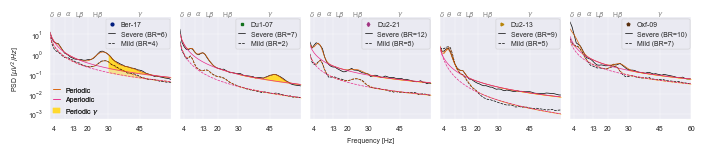

In [7]:
xmin_lin = 2
xmax = 60
bands = ['delta', 'theta', 'alpha', 'beta_low', 'beta_high',
        #  'gamma_low', 'gamma_mid'
        'gamma'
         ]

cond = 'on'
col = f"patient_symptom_dominant_side_BR_{cond}"

n_cols = len(cfg.EXEMPLARY_SUBS_APERIODIC)
fig, axes = plt.subplots(1, n_cols, figsize=(7, 1.5), sharey=True)

for i, sub in enumerate(cfg.EXEMPLARY_SUBS_APERIODIC):

    df_sub = df[(df.subject == sub) & (df.cond == cond)]
    sub_nme = df_sub.subject_nme.values[0]

    df_mild_sub = df_sub[df_sub[col] == 'mild side']
    df_severe_sub = df_sub[df_sub[col] == 'severe side']

    freqs = df_mild_sub.psd_freqs.values[0]
    freqs_fm = df_mild_sub.fm_freqs.values[0]

    mask_fm = (freqs_fm >= xmin_lin) & (freqs_fm <= xmax)
    mask = (freqs >= xmin_lin) & (freqs <= xmax)

    freqs = freqs[mask]
    freqs_fm = freqs_fm[mask_fm]

    psd_mild = df_mild_sub.psd.values[0][mask]
    psd_severe = df_severe_sub.psd.values[0][mask]

    fm_mild_total = df_mild_sub.fm_fooofed_spectrum.values[0][mask_fm]
    fm_mild_per = df_mild_sub.fm_psd_peak_fit.values[0][mask_fm]
    fm_mild_ap = df_mild_sub.fm_psd_ap_fit.values[0][mask_fm]

    fm_severe_total = df_severe_sub.fm_fooofed_spectrum.values[0][mask_fm]
    fm_severe_per = df_severe_sub.fm_psd_peak_fit.values[0][mask_fm]
    fm_severe_ap = df_severe_sub.fm_psd_ap_fit.values[0][mask_fm]

    mild_score = df_mild_sub.UPDRS_bradyrigid_contra.values[0]
    severe_score = df_severe_sub.UPDRS_bradyrigid_contra.values[0]

    # Extract differences
    offset_diff = df_severe_sub.fm_offset_log.values[0] - df_mild_sub.fm_offset_log.values[0]
    exp_diff = df_severe_sub.fm_exponent.values[0] - df_mild_sub.fm_exponent.values[0]
    gamma_diff = df_severe_sub.gamma_fm_powers_max_log.values[0] - df_mild_sub.gamma_fm_powers_max_log.values[0]

    ax = axes[i]
    ax.semilogy(freqs, psd_severe, 'k',
                label=f'Severe (BR={severe_score:.0f})'
                # label=f'BR={severe_score:.0f}'
                )
    ax.semilogy(freqs, psd_mild, 'k--',
                label=f'Mild (BR={mild_score:.0f})'
                # label=f'BR={mild_score:.0f}'
                )
    # label_per = 'Periodic\n' + r'($\Delta \gamma$' + f'={gamma_diff:.2f})'
    # label_per = r'$\Delta \gamma$' + f'={gamma_diff:.2f}'
    # label_ap = 'Aperiodic\n' + r'($\Delta$' + f' Offset={offset_diff:.2f}\n1/f={exp_diff:.2f})'
    # label_ap = r'$\Delta$' + f' Offset={offset_diff:.2f}\n'r'$\Delta$' + f' 1/f={exp_diff:.2f}'
    if i == 0:
        label_per = 'Periodic'
        label_ap = 'Aperiodic'
        label_gamma = 'Periodic $\\gamma$'
        # bbox_to_anchor = (.6, 1)
        bbox_to_anchor = (1, 1)
    else:
        label_per = None
        label_ap = None
        label_gamma = None
        bbox_to_anchor = (1, 1)
    loc = 'upper right'
    sub_handle = mlines.Line2D([], [], color=cfg.COLORS_SPECIAL_SUBS[i],
                              marker=cfg.SYMBOLS_SPECIAL_SUBS[i],
                              markersize=2, lw=0
                              )
    handles, labels = ax.get_legend_handles_labels()
    handles = [sub_handle] + handles
    labels = [sub_nme] + labels
    leg1 = ax.legend(handles, labels, handlelength=1, loc=loc,
                     borderaxespad=.2,
                     bbox_to_anchor=bbox_to_anchor)
    ax.semilogy(freqs_fm, fm_severe_total, cfg.COLOR_DIC['periodic'], label=label_per)
    ax.semilogy(freqs_fm, fm_severe_ap, cfg.COLOR_DIC['periodicAP'], label=label_ap)
    ax.semilogy(freqs_fm, fm_mild_total, cfg.COLOR_DIC['periodic'], ls='--', label=None)
    ax.semilogy(freqs_fm, fm_mild_ap, cfg.COLOR_DIC['periodicAP'], ls='--', label=None)

    # fill periodic gamma for subbands
    band = 'gamma'
    f_low, f_high = cfg.BANDS[band]
    color = cfg.BAND_COLORS['gamma_low']
    ax.fill_between(freqs_fm, fm_severe_total, fm_severe_ap,
                    where=(freqs_fm >= f_low) & (freqs_fm <= f_high),
                    color=color, alpha=1, label=label_gamma)
    ax.fill_between(freqs_fm, fm_mild_total, fm_mild_ap,
                    where=(freqs_fm >= f_low) & (freqs_fm <= f_high),
                    color=color, alpha=.5)
    xticks = XTICKS_FREQ_high
    xticklabels = XTICKS_FREQ_high_labels_skip9
    if i != len(cfg.EXEMPLARY_SUBS_APERIODIC) - 1:
        xticks = xticks[:-2]
        xticklabels = xticklabels[:-2]
    ax.set_xticks(xticks, labels=xticklabels)
    ax.set_xlim([xmin_lin, xmax])
    mask = freqs > xmin_lin
    ymax = max(psd_severe[mask].max(), psd_mild[mask].max()) * 1.1
    _add_band_annotations(bands, ax, short=True, y=1.08)

    handles, labels = ax.get_legend_handles_labels()
    handles, labels = handles[2:], labels[2:]
    ax.add_artist(leg1)
    if i == 0:
        leg2 = ax.legend(handles, labels,
                        #  bbox_to_anchor=(.55, 1),
                         bbox_to_anchor=(0, 0), loc='lower left',
                         frameon=False, borderaxespad=0, handlelength=1)
        ax.add_artist(leg2)
    xlabel = 'Frequency [Hz]' if i == 2 else None
    ax.set_xlabel(xlabel)
# fig.supxlabel('Frequency [Hz]')
axes[0].set_ylabel(r'PSD [$\mu V^2/Hz$]')
plt.tight_layout()
_save_fig(fig, f'all_subs_gamma_fits_{cond}', close=False,
            bbox_inches=None, save_dir=join(SAVE_DIR, 'Figure5', ch_choice))
plt.show()

# Supplementary adjacent channels

In [8]:
ch_choice = 'ch_adj_beta_high_max_off'
dataframes = get_dfs(ch_choice)
df = dataframes['df_per']

df = df[~df.project.isin(['all']) & df[col].isin(['mild side', 'severe side'])]

df = df[(df.dominant_side_consistent & df.cond.isin(['on'])) | (df.cond.isin(['off']))]

# remove subjects without fooof
df = df[df.fm_exponent > -1e9]

/Users/moritzgerster/Library/CloudStorage/Dropbox/Code/STN_broadband_power/notebooks/analysis_settings.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['sub_hemi_cond'] = df.sub_hemi + '_' + df.cond
/Users/moritzgerster/Library/CloudStorage/Dropbox/Code/STN_broadband_power/notebooks/analysis_settings.py:81: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pivot['UPDRS_exists'] = pivot.UPDRS_bradyrigid_contra.notna()
/Users/moritzgerster/Library/CloudStorage/Dropbox/Code/STN_broadband_power/notebooks/analysis_settings.py:82: 

In [9]:
# best_subs_gamma_adjacent = ['HirML018', 'FloML007', 'NeuEL019', 'NeuEL026']

In [10]:
# xmin_lin = 2
# xmax = 60
# # for sub in df.subject.unique():
# for sub in cfg.EXEMPLARY_SUBS_GAMMA:

#     df_sub = df[(df.subject == sub) & (df.cond == cond)]
#     if len(df_sub) != 2:
#         continue
#     sub_nme = df_sub.subject_nme.values[0]

#     # df_mild_sub = df_mild[df_mild.subject == sub]
#     # df_severe_sub = df_severe[df_severe.subject == sub]
#     df_mild_sub = df_sub[df_sub[col] == 'mild side']
#     df_severe_sub = df_sub[df_sub[col] == 'severe side']

#     # only choose representative subjects
#     gamma_present = df_sub.gamma_fm_peak_count.values[0] > 0
#     # low_gamma_severe = df_mild_sub.gamma_low_fm_mean.unique() < df_severe_sub.gamma_low_fm_mean.unique()
#     # mid_gamma_severe = df_mild_sub.gamma_fm_mean.unique() < df_severe_sub.gamma_fm_mean.unique()
#     # gamma_severe = df_mild_sub.gamma_fm_powers_max.unique() < df_severe_sub.gamma_fm_powers_max.unique()
#     offset_severe = df_mild_sub.fm_offset_log.unique() < df_severe_sub.fm_offset_log.unique()
#     exponent_severe = df_mild_sub.fm_exponent.unique() > df_severe_sub.fm_exponent.unique()
#     # if not any([gamma_severe, offset_severe]):
#     if not any([exponent_severe, offset_severe, gamma_present]):
#     # if not gamma_present:
#         continue

#     freqs = df_mild_sub.psd_freqs.values[0]
#     freqs_fm = df_mild_sub.fm_freqs.values[0]

#     mask_fm = (freqs_fm >= xmin_lin) & (freqs_fm <= xmax)
#     mask = (freqs >= xmin_lin) & (freqs <= xmax)

#     freqs = freqs[mask]
#     freqs_fm = freqs_fm[mask_fm]

#     psd_mild = df_mild_sub.psd.values[0][mask]
#     psd_severe = df_severe_sub.psd.values[0][mask]

#     fm_mild_total = df_mild_sub.fm_fooofed_spectrum.values[0][mask_fm]
#     fm_mild_per = df_mild_sub.fm_psd_peak_fit.values[0][mask_fm]
#     fm_mild_ap = df_mild_sub.fm_psd_ap_fit.values[0][mask_fm]

#     fm_severe_total = df_severe_sub.fm_fooofed_spectrum.values[0][mask_fm]
#     fm_severe_per = df_severe_sub.fm_psd_peak_fit.values[0][mask_fm]
#     fm_severe_ap = df_severe_sub.fm_psd_ap_fit.values[0][mask_fm]

#     mild_score = df_mild_sub.UPDRS_bradyrigid_contra.values[0]
#     severe_score = df_severe_sub.UPDRS_bradyrigid_contra.values[0]
#     try:
#         peaks_mild = [peak for peak in df_mild_sub.fm_center_freqs.values[0]
#                         if peak < xmax and peak > xmin_lin]
#     except:
#         peaks_mild = [peak for peak in df_mild_sub.fm_center_freqs.to_list()
#                         if peak < xmax and peak > xmin_lin]
#     try:
#         peaks_severe = [peak for peak in df_severe_sub.fm_center_freqs.values[0]
#                         if peak < xmax and peak > xmin_lin]
#     except:
#         peaks_severe = [peak for peak in df_severe_sub.fm_center_freqs.to_list()
#                         if peak < xmax and peak > xmin_lin]

#     # Extract differences
#     offset_diff = df_severe_sub.fm_offset_log.values[0] - df_mild_sub.fm_offset_log.values[0]
#     exp_diff = df_severe_sub.fm_exponent.values[0] - df_mild_sub.fm_exponent.values[0]
#     gamma_diff = df_severe_sub.gamma_fm_powers_max_log.values[0] - df_mild_sub.gamma_fm_powers_max_log.values[0]

#     fig, axes = plt.subplots(1, 1, figsize=(2.2, 1.3))
#     # fig, axes = plt.subplots(1, 1, figsize=(3*1.7, 3*1.3))

#     ax = axes
#     ax.semilogy(freqs, psd_severe, 'k', label=f'Severe (BR={severe_score:.0f})')
#     ax.semilogy(freqs, psd_mild, 'k--', label=f'Mild (BR={mild_score:.0f})')
#     label_per = 'Periodic\n' + r'($\Delta \gamma$' + f'={gamma_diff:.2f})'
#     label_ap = 'Aperiodic\n' + r'($\Delta$' + f' Offset={offset_diff:.2f}\n1/f={exp_diff:.2f})'
#     ax.semilogy(freqs_fm, fm_severe_total, cfg.COLOR_DIC['periodic'], label=label_per)
#     ax.semilogy(freqs_fm, fm_severe_ap, cfg.COLOR_DIC['periodicAP'], label=label_ap)
#     ax.semilogy(freqs_fm, fm_mild_total, cfg.COLOR_DIC['periodic'], ls='--', label=None)
#     ax.semilogy(freqs_fm, fm_mild_ap, cfg.COLOR_DIC['periodicAP'], ls='--', label=None)

#     # fill periodic gamma for subbands
#     bands = ['gamma_low', 'gamma_mid']
#     band = 'gamma'
#     # if df_severe_sub[f'{band}_fm_peak_count'].values[0] == 0:
#     #     continue
#     f_low, f_high = cfg.BANDS[band]
#     color = cfg.BAND_COLORS['gamma_low']
#     ax.fill_between(freqs_fm, fm_severe_total, fm_severe_ap,
#                     where=(freqs_fm >= f_low) & (freqs_fm <= f_high),
#                     color=color, alpha=1)
#     ax.fill_between(freqs_fm, fm_mild_total, fm_mild_ap,
#                     where=(freqs_fm >= f_low) & (freqs_fm <= f_high),
#                     color=color, alpha=.5)

#     ax.set_xticks(XTICKS_FREQ_low + [60], XTICKS_FREQ_low + [60])
#     ax.set_ylabel(r'PSD [$\mu V^2/Hz$]')
#     ax.set_xlim([xmin_lin, xmax])
#     mask = freqs > xmin_lin
#     ymax = max(psd_severe[mask].max(), psd_mild[mask].max()) * 1.1
#     bands = ['delta', 'theta', 'alpha', 'beta_low', 'beta_high', 'gamma_low', 'gamma_mid']
#     _add_band_annotations(bands, ax, short=True, y=1.08)
#     ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#     ax.set_xlabel('Frequency [Hz]')
#     # title = f'{sub}. Severe-mild Offset={offset_diff:.2f}, Exponent={exp_diff:.2f}, Gamma={gamma_diff:.2f}'
#     ax.set_title(sub_nme)
#     plt.tight_layout()
#     _save_fig(fig, f'{sub}_gamma_fits', close=False,
#                 bbox_inches=None, save_dir=join(SAVE_DIR, 'Figure5', ch_choice))
#     plt.show()

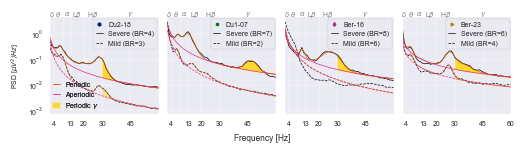

In [11]:
# xmin_lin = 2
# xmax = 60
# bands = ['delta', 'theta', 'alpha', 'beta_low', 'beta_high',
#         #  'gamma_low', 'gamma_mid'
#         'gamma'
#          ]

# cond = 'on'
# col = f"patient_symptom_dominant_side_BR_{cond}"

n_cols = len(cfg.EXEMPLARY_SUBS_GAMMA)
fig, axes = plt.subplots(1, n_cols, figsize=(5.2, 1.5), sharey=True)

for i, sub in enumerate(cfg.EXEMPLARY_SUBS_GAMMA):

    df_sub = df[(df.subject == sub) & (df.cond == cond)]
    sub_nme = df_sub.subject_nme.values[0]

    df_mild_sub = df_sub[df_sub[col] == 'mild side']
    df_severe_sub = df_sub[df_sub[col] == 'severe side']

    freqs = df_mild_sub.psd_freqs.values[0]
    freqs_fm = df_mild_sub.fm_freqs.values[0]

    mask_fm = (freqs_fm >= xmin_lin) & (freqs_fm <= xmax)
    mask = (freqs >= xmin_lin) & (freqs <= xmax)

    freqs = freqs[mask]
    freqs_fm = freqs_fm[mask_fm]

    psd_mild = df_mild_sub.psd.values[0][mask]
    psd_severe = df_severe_sub.psd.values[0][mask]

    fm_mild_total = df_mild_sub.fm_fooofed_spectrum.values[0][mask_fm]
    fm_mild_per = df_mild_sub.fm_psd_peak_fit.values[0][mask_fm]
    fm_mild_ap = df_mild_sub.fm_psd_ap_fit.values[0][mask_fm]

    fm_severe_total = df_severe_sub.fm_fooofed_spectrum.values[0][mask_fm]
    fm_severe_per = df_severe_sub.fm_psd_peak_fit.values[0][mask_fm]
    fm_severe_ap = df_severe_sub.fm_psd_ap_fit.values[0][mask_fm]

    mild_score = df_mild_sub.UPDRS_bradyrigid_contra.values[0]
    severe_score = df_severe_sub.UPDRS_bradyrigid_contra.values[0]

    # Extract differences
    offset_diff = df_severe_sub.fm_offset_log.values[0] - df_mild_sub.fm_offset_log.values[0]
    exp_diff = df_severe_sub.fm_exponent.values[0] - df_mild_sub.fm_exponent.values[0]
    gamma_diff = df_severe_sub.gamma_fm_powers_max_log.values[0] - df_mild_sub.gamma_fm_powers_max_log.values[0]

    ax = axes[i]
    ax.semilogy(freqs, psd_severe, 'k',
                label=f'Severe (BR={severe_score:.0f})'
                # label=f'BR={severe_score:.0f}'
                )
    ax.semilogy(freqs, psd_mild, 'k--',
                label=f'Mild (BR={mild_score:.0f})'
                # label=f'BR={mild_score:.0f}'
                )
    # label_per = 'Periodic\n' + r'($\Delta \gamma$' + f'={gamma_diff:.2f})'
    # label_per = r'$\Delta \gamma$' + f'={gamma_diff:.2f}'
    # label_ap = 'Aperiodic\n' + r'($\Delta$' + f' Offset={offset_diff:.2f}\n1/f={exp_diff:.2f})'
    # label_ap = r'$\Delta$' + f' Offset={offset_diff:.2f}\n'r'$\Delta$' + f' 1/f={exp_diff:.2f}'
    if i == 0:
        label_per = 'Periodic'
        label_ap = 'Aperiodic'
        label_gamma = 'Periodic $\\gamma$'
        # bbox_to_anchor = (.6, 1)
        bbox_to_anchor = (1, 1)
    else:
        label_per = None
        label_ap = None
        label_gamma = None
        bbox_to_anchor = (1, 1)
    loc = 'upper right'
    sub_handle = mlines.Line2D([], [], color=cfg.COLORS_SPECIAL_SUBS[i],
                              marker=cfg.SYMBOLS_SPECIAL_SUBS[i],
                              markersize=2, lw=0
                              )
    handles, labels = ax.get_legend_handles_labels()
    handles = [sub_handle] + handles
    labels = [sub_nme] + labels
    leg1 = ax.legend(handles, labels, handlelength=1, loc=loc,
                     borderaxespad=.2,
                     bbox_to_anchor=bbox_to_anchor)
    ax.semilogy(freqs_fm, fm_severe_total, cfg.COLOR_DIC['periodic'], label=label_per)
    ax.semilogy(freqs_fm, fm_severe_ap, cfg.COLOR_DIC['periodicAP'], label=label_ap)
    ax.semilogy(freqs_fm, fm_mild_total, cfg.COLOR_DIC['periodic'], ls='--', label=None)
    ax.semilogy(freqs_fm, fm_mild_ap, cfg.COLOR_DIC['periodicAP'], ls='--', label=None)

    # fill periodic gamma for subbands
    band = 'gamma'
    f_low, f_high = cfg.BANDS[band]
    color = cfg.BAND_COLORS['gamma_low']
    ax.fill_between(freqs_fm, fm_severe_total, fm_severe_ap,
                    where=(freqs_fm >= f_low) & (freqs_fm <= f_high),
                    color=color, alpha=1, label=label_gamma)
    ax.fill_between(freqs_fm, fm_mild_total, fm_mild_ap,
                    where=(freqs_fm >= f_low) & (freqs_fm <= f_high),
                    color=color, alpha=.5)
    xticks = XTICKS_FREQ_high
    xticklabels = XTICKS_FREQ_high_labels_skip9
    if i != len(cfg.EXEMPLARY_SUBS_GAMMA) - 1:
        xticks = xticks[:-2]
        xticklabels = xticklabels[:-2]
    ax.set_xticks(xticks, labels=xticklabels)
    ax.set_xlim([xmin_lin, xmax])
    mask = freqs > xmin_lin
    ymax = max(psd_severe[mask].max(), psd_mild[mask].max()) * 1.1
    _add_band_annotations(bands, ax, short=True, y=1.08)

    handles, labels = ax.get_legend_handles_labels()
    handles, labels = handles[2:], labels[2:]
    ax.add_artist(leg1)
    if i == 0:
        leg2 = ax.legend(handles, labels,
                        #  bbox_to_anchor=(.55, 1),
                         bbox_to_anchor=(0, 0), loc='lower left',
                         frameon=False, borderaxespad=0, handlelength=1)
        ax.add_artist(leg2)
    ax.set_xlabel(None)
fig.supxlabel('Frequency [Hz]', y=0.05)
axes[0].set_ylabel(r'PSD [$\mu V^2/Hz$]')
plt.tight_layout()
_save_fig(fig, f'all_subs_gamma_fits_{cond}', close=False,
            bbox_inches=None, save_dir=join(SAVE_DIR, 'Figure5', ch_choice))
plt.show()